# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Aditya Maulana Pamungkas
- **Email:** ampaditya55@gmail.com
- **ID Dicoding:** aditya082

## Overview
Proyek ini bertujuan untuk menganalisis dataset *E-Commerce Public Dataset* guna menggali wawasan bisnis yang berharga. Fokus utama analisis ini adalah memahami tren penjualan, preferensi produk pelanggan, serta melakukan segmentasi pelanggan untuk strategi pemasaran yang lebih efektif.

## Menentukan Pertanyaan Bisnis
Sebagai seorang Data analyst, kita perlu merumuskan pertanyaan bisnis yang spesifik untuk memandu proses analisis data:

1.  **Produk apa yang paling diminati oleh pelanggan?**
    (Mengetahui kategori produk dengan volume penjualan tertinggi untuk memprioritaskan stok dan pemasaran.)
2.  **Bagaimana tren penjualan bulanan dalam beberapa tahun terakhir?**
    (Mengidentifikasi pola musiman atau pertumbuhan bisnis jangka panjang.)

## Import Semua Packages/Library yang Digunakan
Berikut adalah library yang digunakan untuk manipulasi data, visualisasi, dan analisis geospasial dasar.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style='darkgrid')
plt.style.use('seaborn-v0_8-darkgrid')

## Data Wrangling
Tahap ini melibatkan pengumpulan data, penilaian kualitas data, dan pembersihan data untuk memastikan analisis yang akurat.

### Gathering Data
Memuat semua tabel data yang relevan dari sumber data.

In [12]:
try:
    customers_df = pd.read_csv("Data/customers_dataset.csv")
    geolocation_df = pd.read_csv("Data/geolocation_dataset.csv")
    order_items_df = pd.read_csv("Data/order_items_dataset.csv")
    order_payments_df = pd.read_csv("Data/order_payments_dataset.csv")
    order_reviews_df = pd.read_csv("Data/order_reviews_dataset.csv")
    orders_df = pd.read_csv("Data/orders_dataset.csv")
    product_category_translation_df = pd.read_csv("Data/product_category_name_translation.csv")
    products_df = pd.read_csv("Data/products_dataset.csv")
    sellers_df = pd.read_csv("Data/sellers_dataset.csv")
    print("Data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")

Data loaded successfully.


### Assessing Data
Memeriksa tipe data, missing values, dan duplikasi untuk memahami kondisi awal dataset.

In [13]:
datasets = {
    "Orders": orders_df,
    "Order Items": order_items_df,
    "Products": products_df,
    "Customers": customers_df
}

for name, df in datasets.items():
    print(f"\n--- Assessing {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Missing Values:\n{df.isna().sum().sum()} total missing")
    print(f"Duplicates: {df.duplicated().sum()} rows")


--- Assessing Orders ---
Shape: (99441, 8)
Missing Values:
4908 total missing
Duplicates: 0 rows

--- Assessing Order Items ---
Shape: (112650, 7)
Missing Values:
0 total missing
Duplicates: 0 rows

--- Assessing Products ---
Shape: (32951, 9)
Missing Values:
2448 total missing
Duplicates: 0 rows

--- Assessing Customers ---
Shape: (99441, 5)
Missing Values:
0 total missing
Duplicates: 0 rows


### Cleaning Data
Langkah perbaikan data meliputi:
1.  Konversi kolom tanggal ke format `datetime`.
2.  Menangani nilai yang hilang (dropping baris dengan data kritis yang hilang).
3.  Menggabungkan tabel menjadi satu dataset master (`all_data`) untuk analisis holistik.
4.  **Export Data**: Menyimpan hasil pengolahan ke file CSV.

In [14]:
# 1. Convert datetime columns
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

# 2. Handle missing values
# Kami menghapus baris di mana 'order_delivered_customer_date' kosong karena kami fokus pada pesanan yang berhasil
orders_df.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date'], inplace=True)

# 3. Merge datasets
# Menggabungkan Orders dengan Items, Products, dan Kategori Bahasa Inggris
main_df = orders_df.merge(order_items_df, on='order_id', how='left')
main_df = main_df.merge(products_df, on='product_id', how='left')
main_df = main_df.merge(product_category_translation_df, on='product_category_name', how='left')

# Rename translated column for easier access
main_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

# Menggabungkan dengan informasi Customer untuk lokasi
all_data = main_df.merge(customers_df, on='customer_id', how='left')

# 4. Export Cleaned Data
all_data.to_csv("all_data.csv", index=False)
print(f"Data cleaning complete. processed data exported to 'all_data.csv'. Shape: {all_data.shape}")

Data cleaning complete. processed data exported to 'all_data.csv'. Shape: (110196, 27)


## Exploratory Data Analysis (EDA)
Eksplorasi awal untuk memahami distribusi variabe utama.

In [15]:
# Statistik Deskriptif untuk nilai pembayaran dan harga barang
print(all_data[['price', 'freight_value']].describe())

               price  freight_value
count  110196.000000  110196.000000
mean      119.976180      19.948531
std       182.299915      15.698307
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.900000      16.260000
75%       134.170000      21.150000
max      6735.000000     409.680000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk Kategori Apa yang Paling Banyak Diminati?

C:\Users\ampad\AppData\Local\Temp\ipykernel_22620\3880399143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


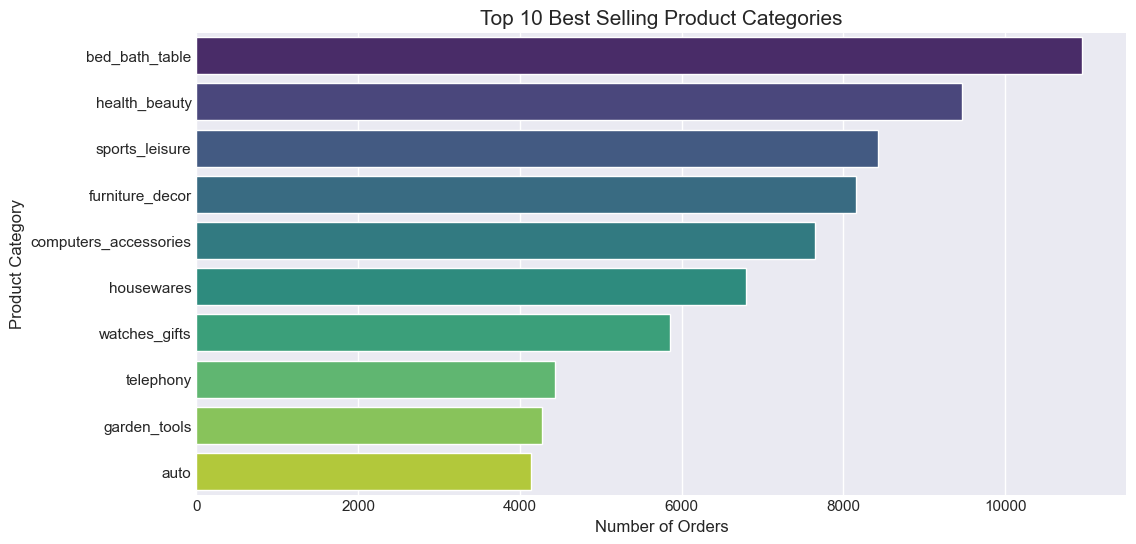

In [16]:
plt.figure(figsize=(12, 6))
top_categories = all_data['product_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Best Selling Product Categories', fontsize=15)
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

**Insight:**
Grafik diatas menunjukkan bahwa kategori **Bed Bath Table** dan **Health Beauty** adalah produk yang paling mendominasi penjualan.

### Pertanyaan 2: Bagaimana Tren Penjualan Bulanan?

C:\Users\ampad\AppData\Local\Temp\ipykernel_22620\254720257.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = all_data.resample('M', on='order_purchase_timestamp').size()


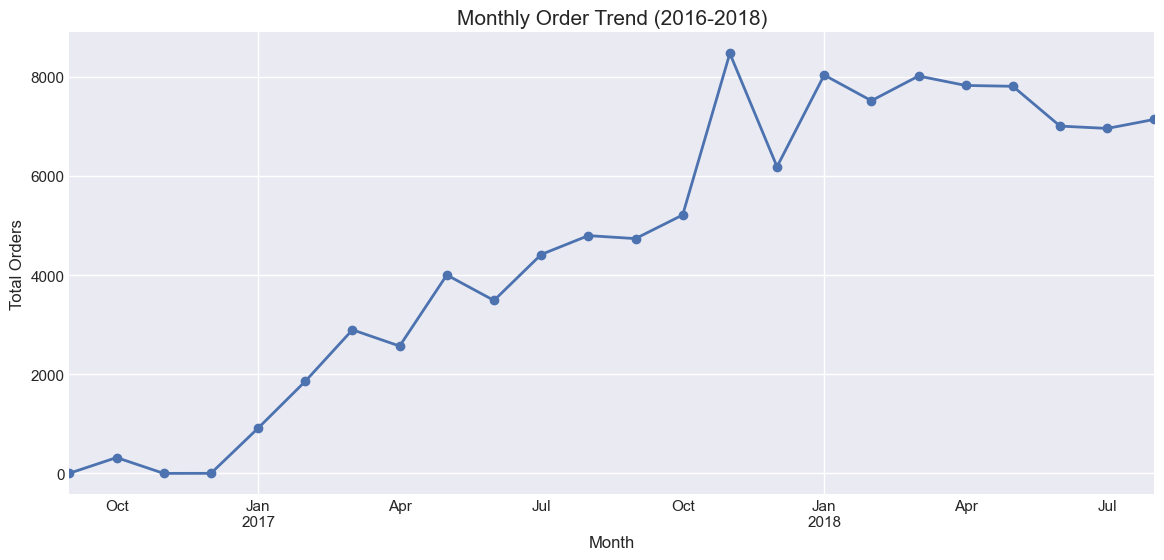

In [17]:
monthly_orders = all_data.resample('M', on='order_purchase_timestamp').size()

plt.figure(figsize=(14, 6))
monthly_orders.plot(kind='line', marker='o', color='#4c72b0', linewidth=2)
plt.title('Monthly Order Trend (2016-2018)', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

**Insight:**
Terlihat tren kenaikan yang signifikan dari awal 2017 hingga puncaknya di akhir 2017 (kemungkinan efek Black Friday), diikuti dengan pola stabil di tahun 2018.

## Analisis Lanjutan
1.  **RFM Analysis**: Mengukur loyalitas dan nilai pelanggan.
2.  **Geospatial Analysis**: Persebaran pelanggan.
3.  **Clustering Manual**: Segmentasi berdasarkan pengeluaran.

--- RFM Analysis ---


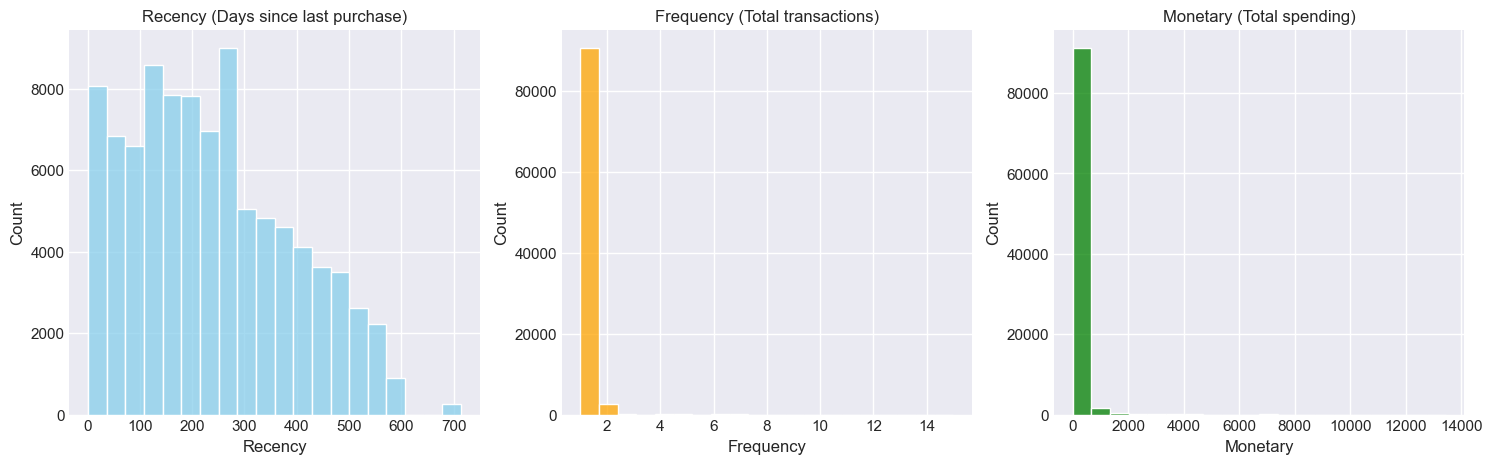


--- Top 5 Customer Distribution by State ---


C:\Users\ampad\AppData\Local\Temp\ipykernel_22620\4236417192.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='Blues_r')


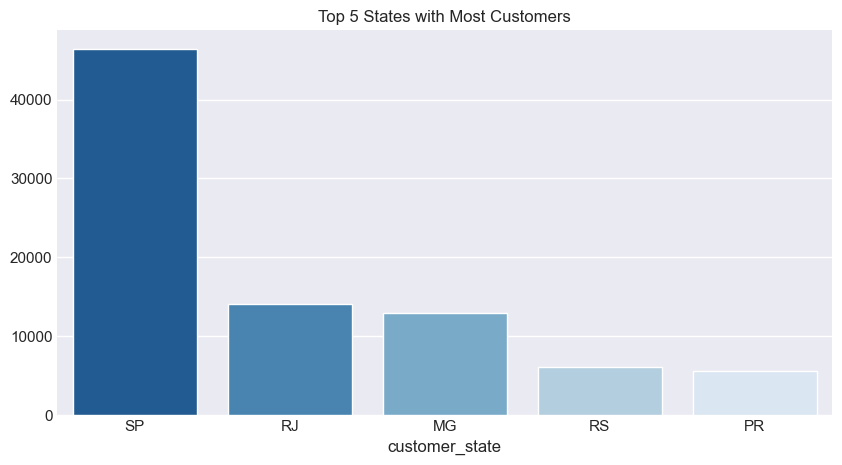

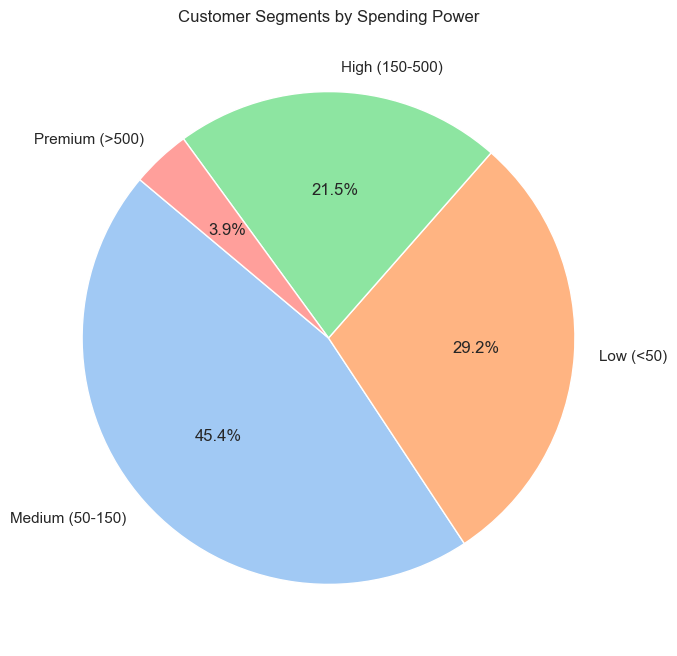

In [18]:
# --- 1. RFM Analysis ---
print("--- RFM Analysis ---")
current_date = all_data['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

rfm_df = all_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm_df.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Visualisasi RFM
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm_df['Recency'], bins=20, ax=ax[0], color='skyblue').set_title('Recency (Days since last purchase)')
sns.histplot(rfm_df['Frequency'], bins=20, ax=ax[1], color='orange').set_title('Frequency (Total transactions)')
sns.histplot(rfm_df['Monetary'], bins=20, ax=ax[2], color='green').set_title('Monetary (Total spending)')
plt.show()

# --- 2. Geospatial Analysis ---
print("\n--- Top 5 Customer Distribution by State ---")
state_counts = all_data['customer_state'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='Blues_r')
plt.title('Top 5 States with Most Customers')
plt.show()

# --- 3. Clustering (Manual Grouping) ---
spending_bins = [0, 50, 150, 500, float('inf')]
spending_labels = ['Low (<50)', 'Medium (50-150)', 'High (150-500)', 'Premium (>500)']

rfm_df['Spending_Segment'] = pd.cut(rfm_df['Monetary'], bins=spending_bins, labels=spending_labels)
segment_counts = rfm_df['Spending_Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'))
plt.title('Customer Segments by Spending Power')
plt.show()

## Conclusion

1.  **Produk Terlaris**: Kategori 'Bed Bath Table' adalah yang paling populer. Strategi promosi dapat difokuskan pada kategori ini untuk menarik trafik baru, atau melakukan cross-selling dengan kategori lain.
2.  **Tren Penjualan**: Terdapat pola musiman yang kuat, dengan lonjakan di akhir tahun. Persiapan stok harus ditingkatkan menjelang Q4.
3.  **Segmentasi Pelanggan**: Mayoritas pelanggan berada di segmen 'Low' hingga 'Medium' spending. Namun, terdapat segmen 'Premium' yang meski kecil secara jumlah, memberikan kontribusi nilai yang besar. Program loyalitas eksklusif bisa ditargetkan untuk mempertahankan segmen Premium ini.

In [19]:
pip freeze requirements.txt

aiobotocore @ file:///C:/b/abs_431uzunk2v/croot/aiobotocore_1738237882529/work
aiohappyeyeballs @ file:///C:/b/abs_e9fm5mk6ak/croot/aiohappyeyeballs_1734469429350/work
aiohttp @ file:///C:/b/abs_d4_gdjffav/croot/aiohttp_1734687146788/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/alabaster_1729041938345/work
alembic==1.17.2
altair @ file:///C:/b/abs_0b1avjyzoc/croot/altair_1743016738596/work
anaconda-anon-usage @ file:///C:/b/abs_1az9wuczyu/croot/anaconda-anon-usage_1749054795139/work
anaconda-auth @ file:///C:/b/abs_66s84uss7v/croot/anaconda-cloud-auth-split_1747863792543/work
anaconda-catalogs @ file:///C:/b/abs_ac59ma63va/croot/anaconda-catalogs_1747774731997/work
anaconda-cli-base @ file:///C:/b/abs_e4_l2p3q_7/croot/anaconda-cli-base_1741369468349/work
anaconda-client @ file:///C:/b/abs_0aa49y56xo/croot/anacond